# Logistic Regression 

## import library

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [14]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [15]:
def linear_regression(theta, x, y):

    n = x.size
    one = np.ones(shape=(n,))
    X = np.column_stack((one, x, y))
    
    value = np.dot(X, theta)
    
    return value

## define sigmoid function with input $x$

In [16]:
def sigmoid(a):
     
    z = 1 / (1 + np.exp(-a))
    
    return z

## define loss function for the logistic regression

In [25]:
def compute_loss(theta, x, y, l):
    
    n = x.size
    
    h = sigmoid(linear_regression(theta, x, y))
    
    resi = (-l*np.log(h)) - ((1-l)*np.log(1 - h))
    
    loss = np.sum(resi) / n
    
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [26]:
def compute_gradient(theta, x, y, l):
    
    n = x.size
    resi = np.zeros(shape=(n,theta.size))    
    
    one = np.ones(shape=(n,))
    X = np.column_stack((one, x, y))
    
    h = sigmoid(linear_regression(theta, x, y))
    
    for i in range(0,3):
        resi[:,i] += (h - l)*X[:,i]
        
    gradient = np.zeros(3)
    
    for i in range(0,3):
        gradient[i] = np.sum(resi[:,i]) / n

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [27]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters

theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

## iterations for the gradient descent

In [28]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient(theta, point_x, point_y, label)
    loss = compute_loss(theta, point_x, point_y, label)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss


## plot the results

In [29]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')
    
    plt.plot(loss_iteration,'-',color='red')
   
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [30]:
def plot_data(x, y, l):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    xblue = [x[i] for i in range(0, x.size) if l[i]==0]
    xred = [x[i] for i in range(0, x.size) if l[i]==1]
    yblue = [y[i] for i in range(0, x.size) if l[i]==0]
    yred = [y[i] for i in range(0, x.size) if l[i]==1]
    
    plt.plot(xblue, yblue, '.', color = 'blue')
    plt.plot(xred, yred, '.', color = 'red')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.plot(theta_iteration[:,0], '-', color='green')
    plt.plot(theta_iteration[:,1], '-', color='red')
    plt.plot(theta_iteration[:,2], '-', color='blue')
    

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [63]:
def plot_classifier(theta, x, y, l):
    
    xblue = [x[i] for i in range(0, x.size) if l[i]==0]
    xred = [x[i] for i in range(0, x.size) if l[i]==1]
    yblue = [y[i] for i in range(0, x.size) if l[i]==0]
    yred = [y[i] for i in range(0, x.size) if l[i]==1]
    
    plt.plot(xblue, yblue, '.', color = 'blue')
    plt.plot(xred, yred, '.', color = 'red')
    
    for i in range(x.size):
        if label[i]==0.5:
            plt.plot(label, '-', color='black')
    
    

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

No handles with labels found to put in legend.


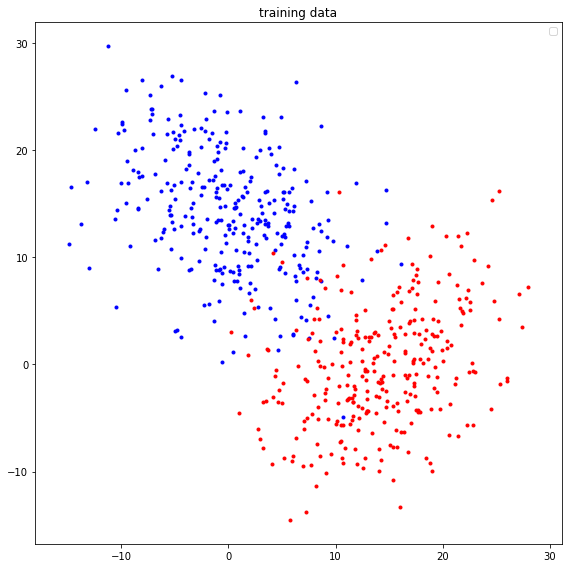

In [64]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

No handles with labels found to put in legend.


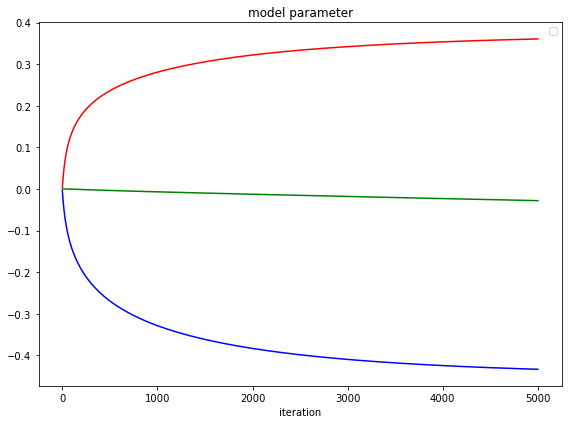

In [65]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

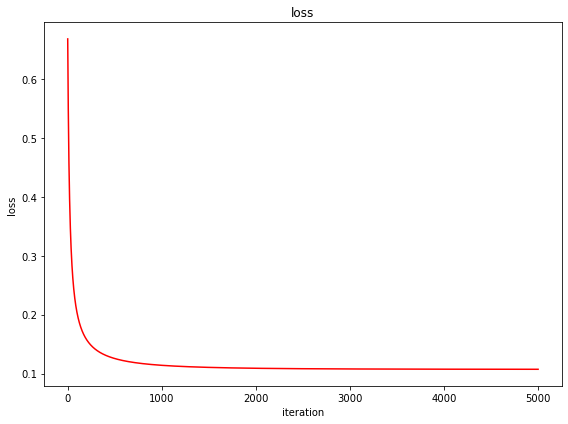

In [66]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

No handles with labels found to put in legend.


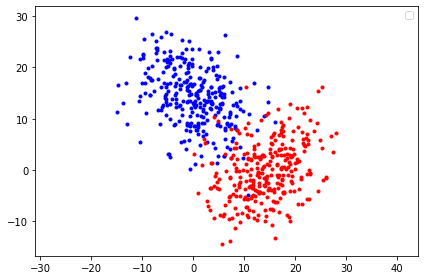

In [67]:
plot_classifier(theta, point_x, point_y, label)